In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

/home/scot/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## 10

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Carseats.csv")
df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
results = smf.ols('Sales ~ Price + Urban + US', data=df).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 25 Jan 2018   Prob (F-statistic):           2.39e-23
Time:                        05:16:50   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (b)
Based off the linear regression there does seem to be a negative relationship between price and sales and a positive relationship between being in the US and sales. There does not seem to be any relationship between Urban and sales due to the high p-value.

### (c) - (e)
$$y_1=\beta_0 + \beta_1x_i + +\beta_2z_i+\epsilon_i = \left\{
        \begin{array}{ll}
            \beta_0 + \beta_1 + \beta_2 + \epsilon_i \quad if\ US\ is\ True \\
            \beta_0 +  \beta_2+ \epsilon_i\ \ \ \ \ \ \ \quad \ if\ US\ is\ False
        \end{array}
    \right.$$
    
 
 $\beta_0 = 13.0435, \ $
 $\beta_1 = 1.2,\ $
 $\beta_2 = -0.0545\ $
 
 I would not use Urban predictor as it has a very high p-value. Instead I wrote the above piecewise function based off the other predictors of Price and US. 

### (f)


In [6]:
results2 = smf.ols('Sales ~ Price + US', data=df).fit()

results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 25 Jan 2018   Prob (F-statistic):           2.66e-24
Time:                        05:48:19   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The models fit very similarly with very similar R<sup>2</sup> values. This might be due to the very small likelyhood that Urban has a relationship with Sales.

### (g)
The confidence intervals are in both of the summary printouts for each regression (the last two columns of the table)

### (h)


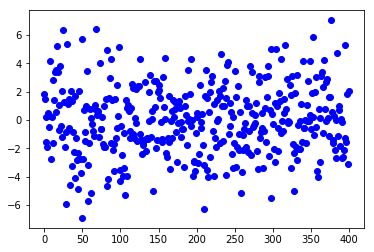

In [14]:
plt.plot(results2.resid, 'bo')

     student_resid   unadj_p  bonf(p)
376       2.892264  0.004036      1.0
68        2.642596  0.008554      1.0
25        2.597261  0.009748      1.0
352       2.390776  0.017280      1.0
49        2.335369  0.020024      1.0


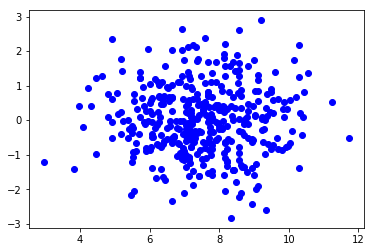

In [15]:
outliers = results.outlier_test()
stud_resid = outliers.student_resid
ypred = results.predict()
print(outliers.sort_values(by="student_resid", ascending=False).head())
plt.plot(ypred, stud_resid, 'bo')

There does not seem to be any outliers.

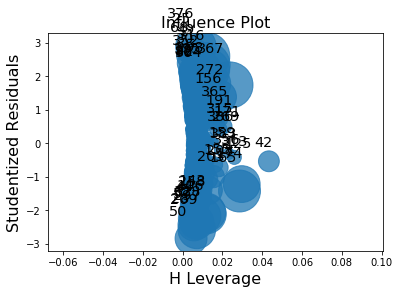

In [17]:
fig = sm.graphics.influence_plot(results2, criterion="cooks")
